In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras

import numpy as np 
import pandas as pd
import glob
import cv2
import os
from pathlib import Path
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

import os
import tensorflow as tf
from keras import layers
from keras import Model
from os import getcwd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout,Flatten
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data_dir = Path('/content/COVID Splitaug2') # Your Dataset Location Path
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
#test_dir2 = os.path.join(data_dir, 'Test2')
val_dir = os.path.join(data_dir, 'Val')
train_malaria_dir = os.path.join(train_dir, 'COVID') #Replace the folder names
train_uninfected_dir = os.path.join(train_dir, 'NON-COVID')
validation_malaria_dir = os.path.join(val_dir, 'COVID')
validation_uninfected_dir = os.path.join(val_dir, 'NON-COVID')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
#test_malaria_dir2 = os.path.join(test_dir2, 'COVID') #Replace the folder names
#test_uninfected_dir2 = os.path.join(test_dir2, 'NON-COVID')

train_malaria_fnames = os.listdir(train_malaria_dir)
train_uninfected_fnames = os.listdir(train_uninfected_dir)
validation_malaria_fnames = os.listdir(validation_malaria_dir)
validation_uninfected_fnames = os.listdir(validation_uninfected_dir)
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
##test_malaria_fnames2 = os.listdir(test_malaria_dir2)
#test_uninfected_fnames2 = os.listdir(test_uninfected_dir2)


print(len(train_malaria_fnames))
print(len(validation_malaria_fnames))
print(len(train_uninfected_fnames))
print(len(validation_uninfected_fnames))
print("Test Covid", len(test_malaria_fnames))
print("Test Noncovid", len(test_uninfected_fnames))



955
60
1170
58
Test Covid 98
Test Noncovid 105


In [5]:
train_datagen = ImageDataGenerator(
                                   preprocessing_function=tf.keras.applications.xception.preprocess_input
                                   #rotation_range = 20,
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   #shear_range = 0.2,
                                   #zoom_range = 0.2,
                                    #horizontal_flip = True
                                   )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(299, 299)
                                                    )
validation_datagen = ImageDataGenerator(
                                        preprocessing_function=tf.keras.applications.xception.preprocess_input
                                        )
 

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=16,
                                                              class_mode='categorical',
                                                              target_size=(299, 299))

Found 2125 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [6]:
model = keras.applications.Xception(input_shape = (299, 299, 3), 
                                include_top = True, 
                                weights = 'imagenet')


for layer in model.layers:
    layer.trainable = True
  
    
model.summary()

91889664/91884032 [==============================] - 2s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [7]:
last_layer = model.get_layer('avg_pool')
last_output = last_layer.output

x = keras.layers.Dense(2,activation='softmax')(last_output)           

model = Model( model.input, x) 

model.compile(optimizer = Adam(lr=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [8]:
early = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=1
)
#history = model.fit(
            #x=X_train, y=y_train, 
             #       batch_size=16,
              #      epochs=50, 
               #     validation_data=(X_val , y_val),callbacks = [early],
            #
            #verbose=1
        #)
history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 15, 
            callbacks = [early]
            )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
133/133 [==============================] - 1505s 11s/step - loss: 0.5668 - acc: 0.7379 - val_loss: 0.5636 - val_acc: 0.7203
Epoch 2/15
133/133 [==============================] - 1502s 11s/step - loss: 0.3096 - acc: 0.9115 - val_loss: 0.3770 - val_acc: 0.8559
Epoch 3/15
133/133 [==============================] - 1473s 11s/step - loss: 0.1652 - acc: 0.9619 - val_loss: 0.2254 - val_acc: 0.9407
Epoch 4/15
133/133 [==============================] - 1474s 11s/step - loss: 0.0809 - acc: 0.9882 - val_loss: 0.1326 - val_acc: 0.9492
Epoch 5/15
133/133 [==============================] - 1471s 11s/step - loss: 0.0428 - acc: 0.9953 - val_loss: 0.1199 - val_acc: 0.9492
Epoch 6/15
133/133 [==============================] - 1491s 11s/step - loss: 0.0391 - acc: 0.9939 - val_loss: 0.1023 - val_acc: 0.9576
Epoch 7/15
133/133 [==============================] - 1488s 11s/step - loss: 0.0240 - acc: 0.9967 - val_loss: 0.09

In [9]:

data_dir = Path('/content/COVID Splitaug2')
test_dir = os.path.join(data_dir, 'Test')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
print(len(test_malaria_fnames))
print(len(test_uninfected_fnames))

98
105


In [10]:
testGenerator = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(test_dir, 
                                                      batch_size=16,
                                                    class_mode='categorical',shuffle=False,target_size=(299,299)
                                                      )

Found 203 images belonging to 2 classes.


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
batch_size = 16
num_of_test_samples = 203
predictions = model.predict_generator(testGenerator)

y_pred = np.argmax(predictions, axis=1)

true_classes = testGenerator.classes

class_labels = list(testGenerator.class_indices.keys())   

print(class_labels)

print(confusion_matrix(testGenerator.classes, y_pred))

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

Instructions for updating:
Please use Model.predict, which supports generators.
['COVID', 'NON-COVID']
[[82 16]
 [ 6 99]]
              precision    recall  f1-score   support

       COVID       0.93      0.84      0.88        98
   NON-COVID       0.86      0.94      0.90       105

    accuracy                           0.89       203
   macro avg       0.90      0.89      0.89       203
weighted avg       0.90      0.89      0.89       203



In [12]:
model.evaluate(testGenerator)

13/13 [==============================] - 27s 2s/step - loss: 0.3884 - acc: 0.8916


[0.38838621973991394, 0.8916256427764893]

In [13]:
from sklearn.metrics import  f1_score,roc_auc_score
f1_score(testGenerator.classes, y_pred)


0.8999999999999999

In [14]:
roc_auc_score(testGenerator.classes, y_pred)

0.889795918367347

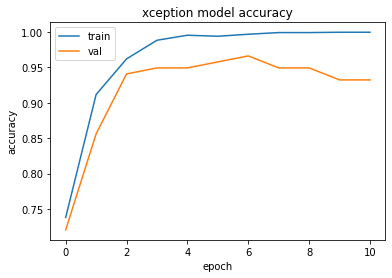

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('xception model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()

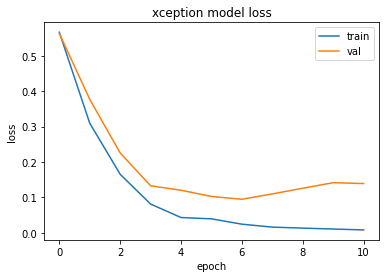

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('xception model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()